In [1]:
from bar_constants import *
set_save_fig_rc()
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

## Circular Bar Chart

In [2]:
size = 100
np.random.seed(0)
df = pd.DataFrame(
        {
            'Name': ['item ' + str(i) for i in list(range(1, size+1)) ],
            'Value': np.arange(0, size),
        })

# Reorder the dataframe
df = df.sort_values(by=['Value'])

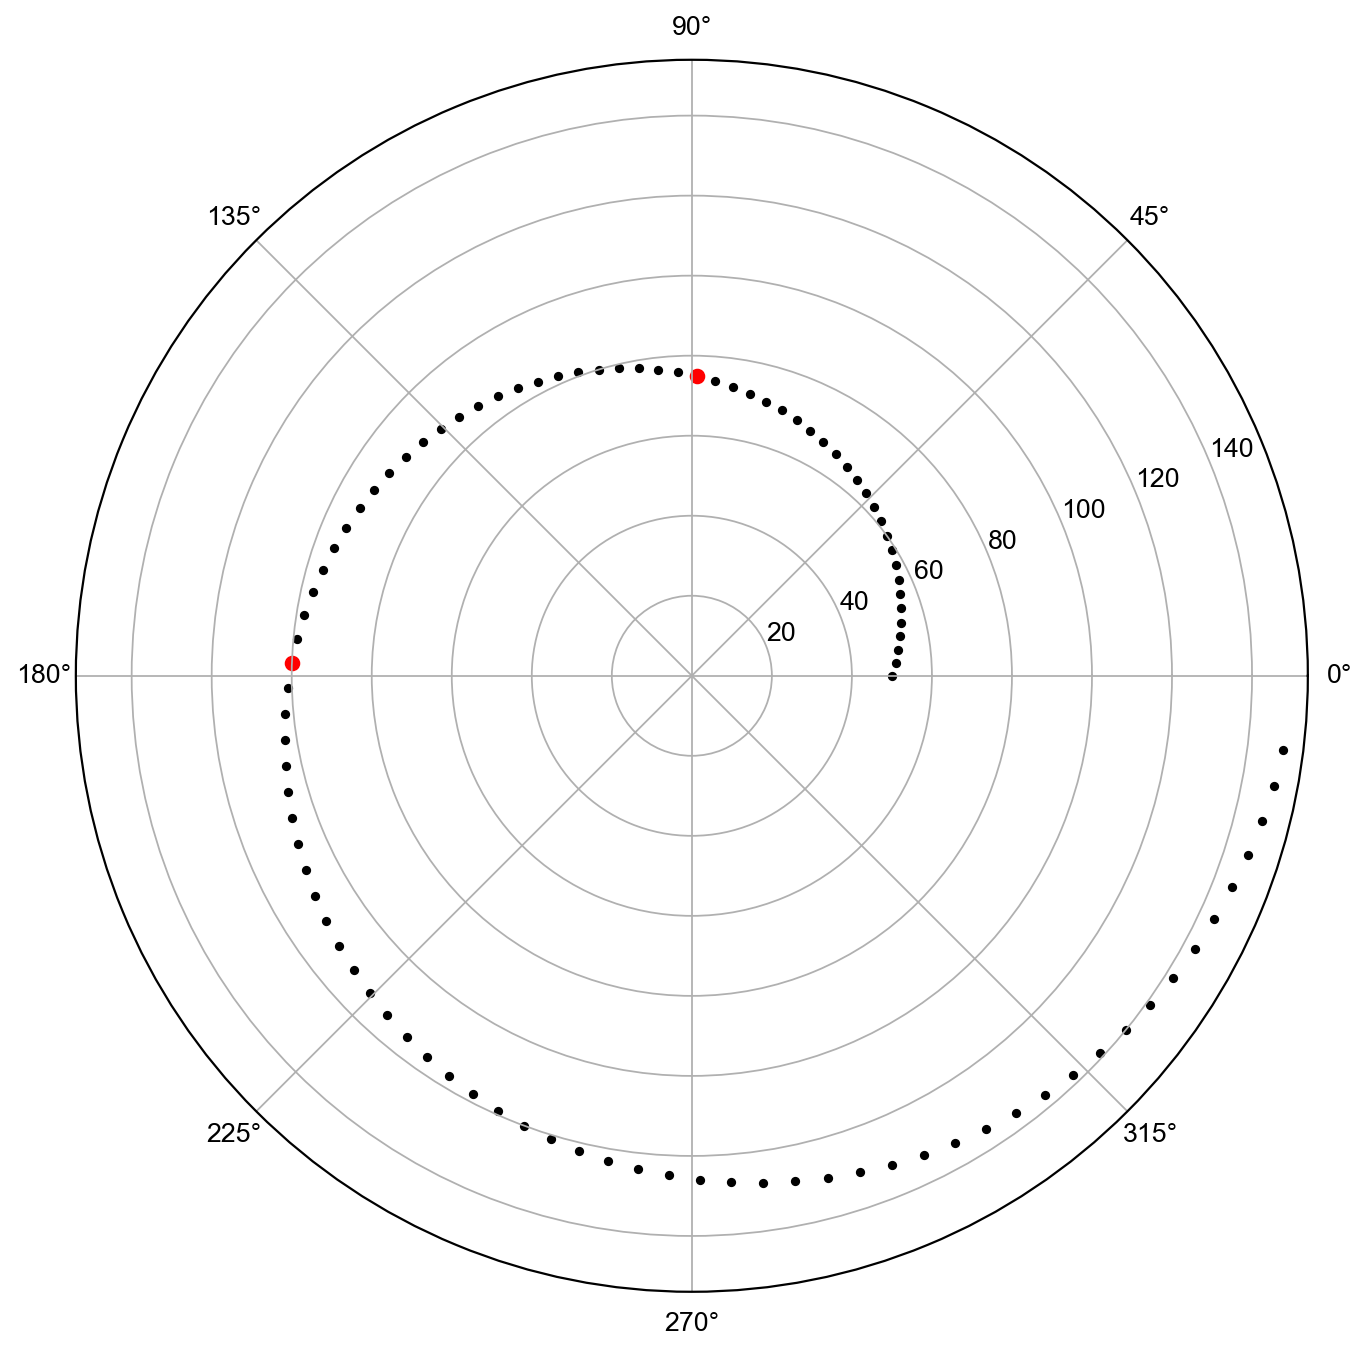

In [3]:
base = 50
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': 'polar'})
for i in range(df.shape[0]):
    theta = 2 * np.pi / (df.shape[0] + 1) * i
    height = base + i
    ax.scatter([theta], [height], s=10, color='k')

for i in [25, 50]:
    theta = 2 * np.pi / (df.shape[0] + 1) * i
    height = base + i
    ax.scatter([theta], [height], color='r')

# ax.axis('off')

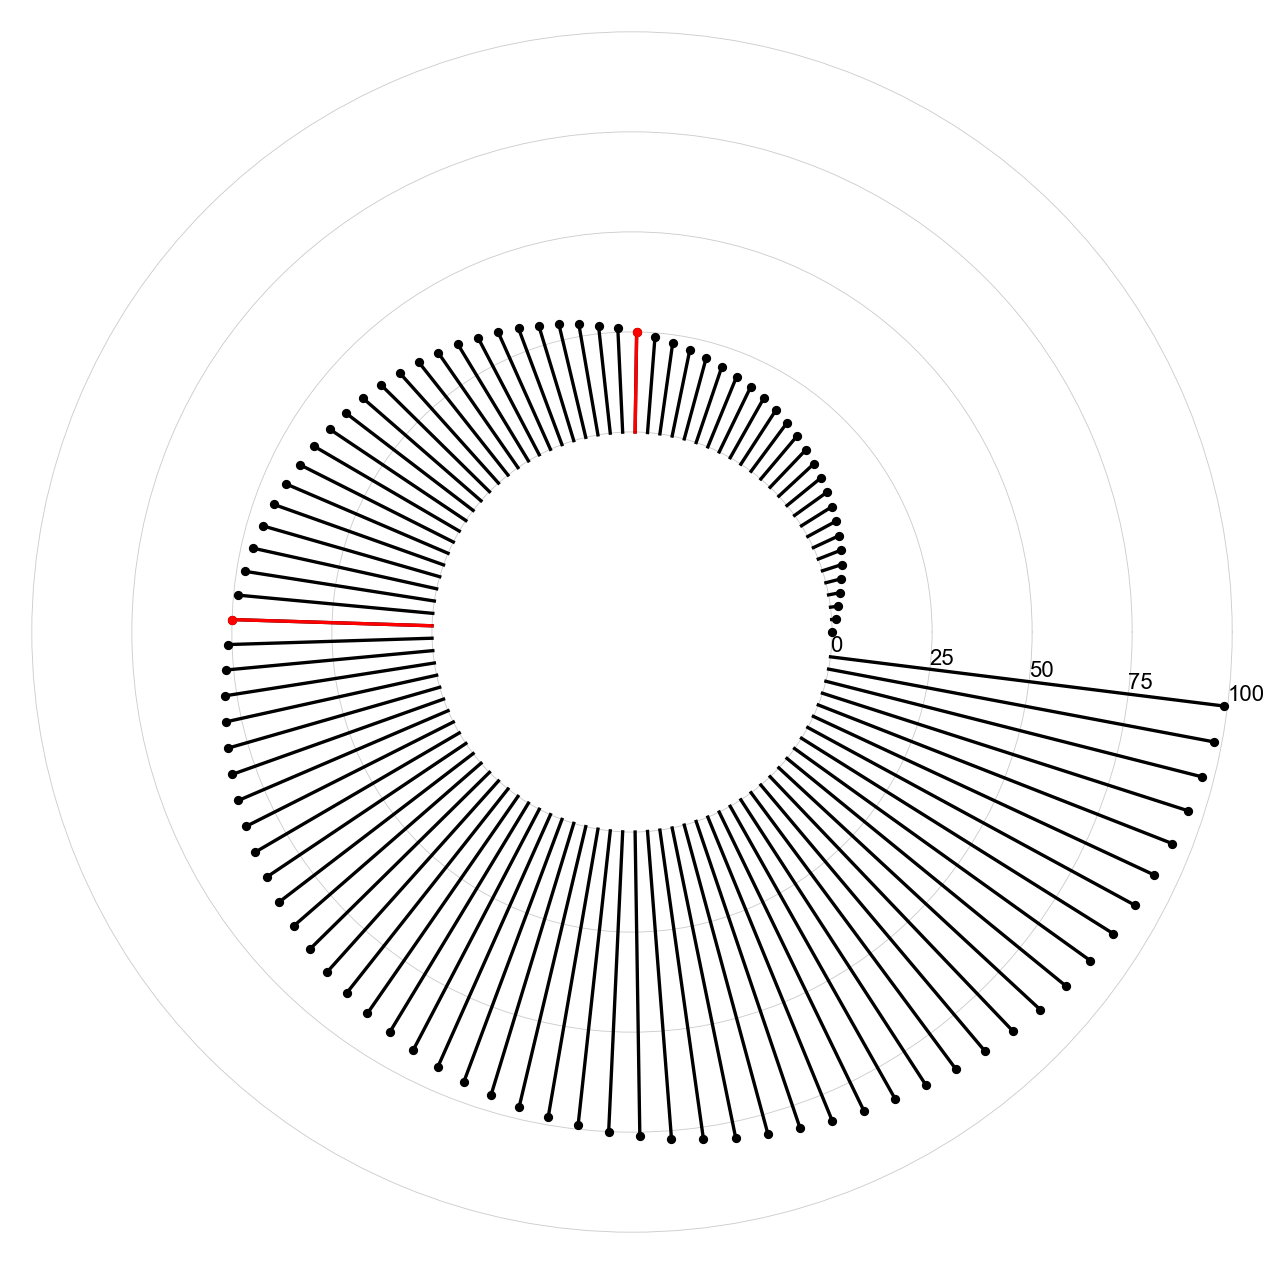

In [4]:
base = 50
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': 'polar'})
for i in range(df.shape[0]):
    theta = 2 * np.pi / (df.shape[0] + 1) * i
    height = base + i
    ax.plot([theta, theta], [base, height], 'k-', lw=1.5, zorder=0)
    ax.scatter([theta], [height], s=10, color='k', zorder=2)

for i in [25, 50]:
    theta = 2 * np.pi / (df.shape[0] + 1) * i
    height = base + i
    ax.plot([theta, theta], [base, height], 'r-', lw=1.5, zorder=0)
    ax.scatter([theta], [height], s=10, color='r', zorder=2)

ax.spines['polar'].set_visible(False)
ax.set_xticks([])
yticklabels = np.array([0, 25, 50, 75, 100])
yticks = yticklabels + 50
ax.set_yticks(yticks)
ax.set_yticklabels(yticklabels)
ax.xaxis.grid(False)
ax.yaxis.grid(True, color='k', linestyle='-', lw=0.4, alpha=0.2, zorder=1)
ax.yaxis.set_tick_params(labelsize=10)
ax.set_rlabel_position(-7)
# ax.axis('off')
# plt.savefig('a.svg', format='svg', transparent=True)

In [5]:
# Constants = parameters controling the plot layout:
lower_limit = 227
upper_limit = lower_limit + 50
label_padding = 4

(0.0, 277.0)

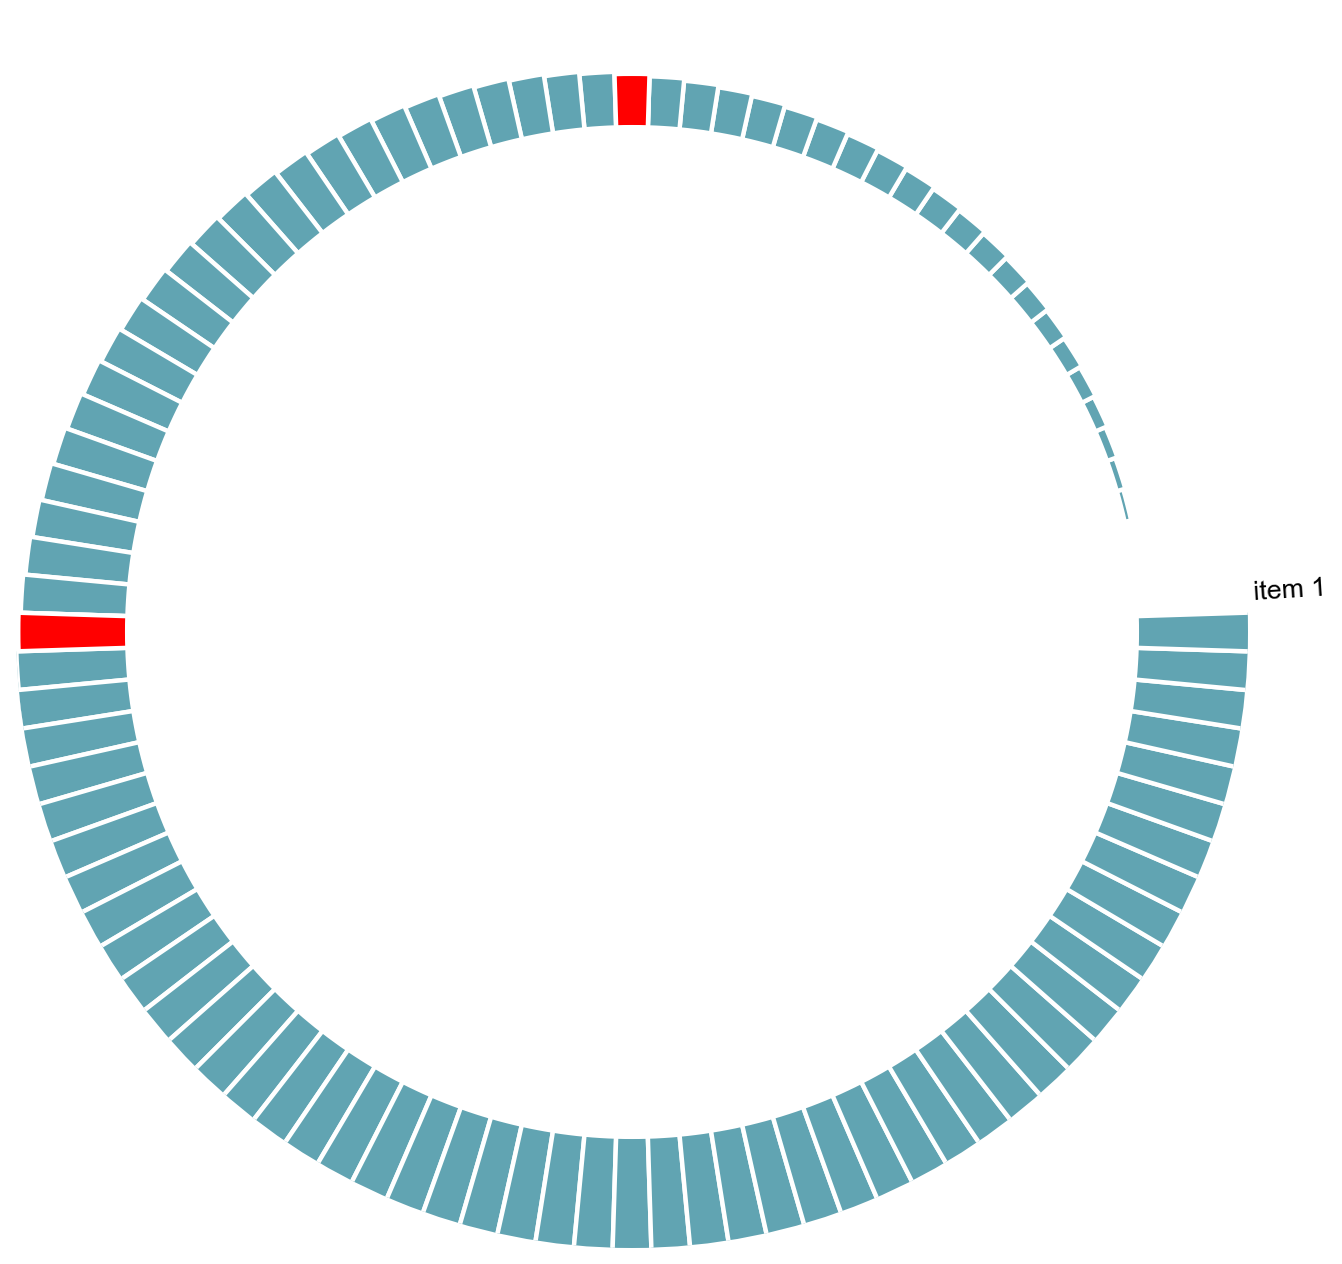

In [6]:
# initialize the figure
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': 'polar'})
plt.axis('off')

heights = df['Value']

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(df.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(df.index)+1))
angles = [element * width for element in indexes]

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lower_limit,
    linewidth=2, 
    edgecolor="white",
    color="#61a4b2",
)

for i in [24, 49]:
    bars = ax.bar(
        x=angles[i], 
        height=heights[i], 
        width=width, 
        bottom=lower_limit,
        linewidth=2, 
        edgecolor="white",
        color="red",
    )

# Add labels
for bar, angle, height, label in zip(bars,angles, heights, df["Name"]):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lower_limit + bar.get_height() + label_padding, 
        s=label, 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor"
    )

ax.set_ylim(0, upper_limit)

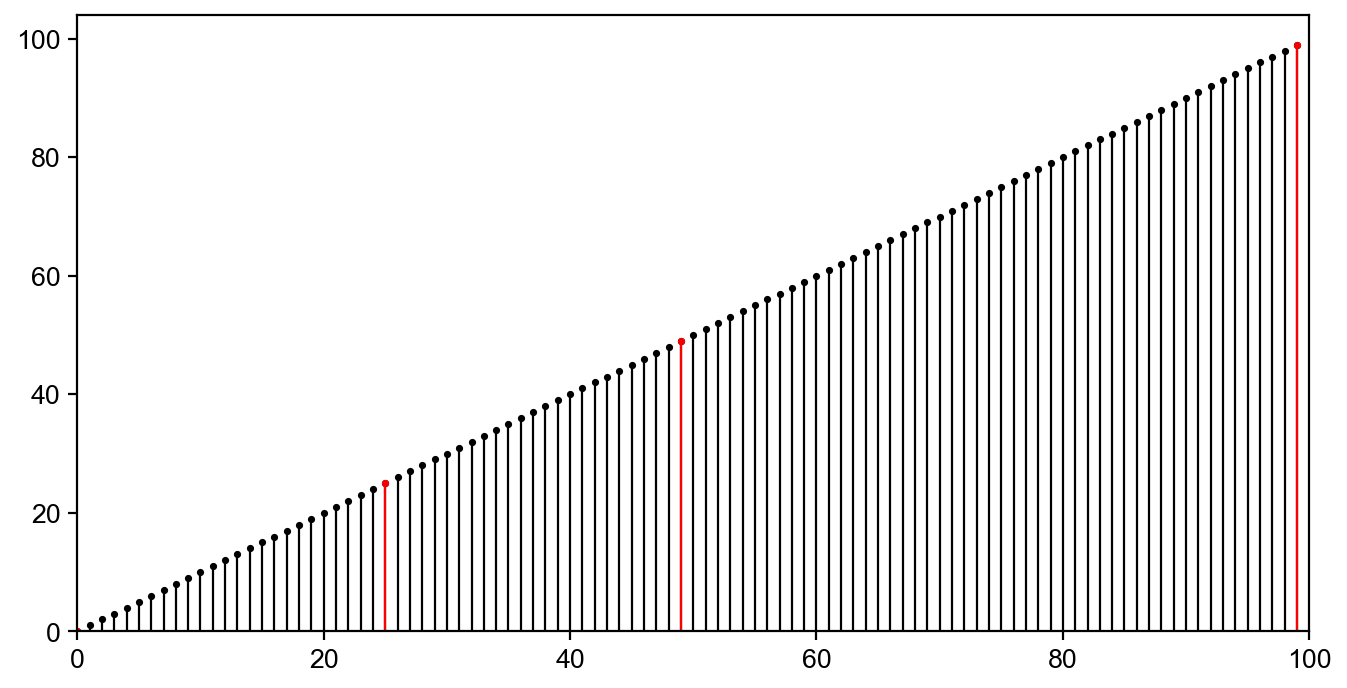

In [13]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(df.index, df['Value'], s=5, color='k')
for i in range(df.shape[0]):
    theta = i
    height = base + i
    ax.plot([theta, theta], [0, df['Value'][i]], 'k-', lw=1)
for i in [0, 25, 49, 99]:
    theta = i
    height = base + i
    ax.plot([theta, theta], [0, df['Value'][i]], 'r-', lw=1)
    ax.scatter(theta, df['Value'][i], s=5, color='r')
ax.set_xlim(0, 100)
ax.set_ylim(0)
ax.set_box_aspect(1/2)

## Radial Bar Plot

In [8]:
from matplotlib import cm

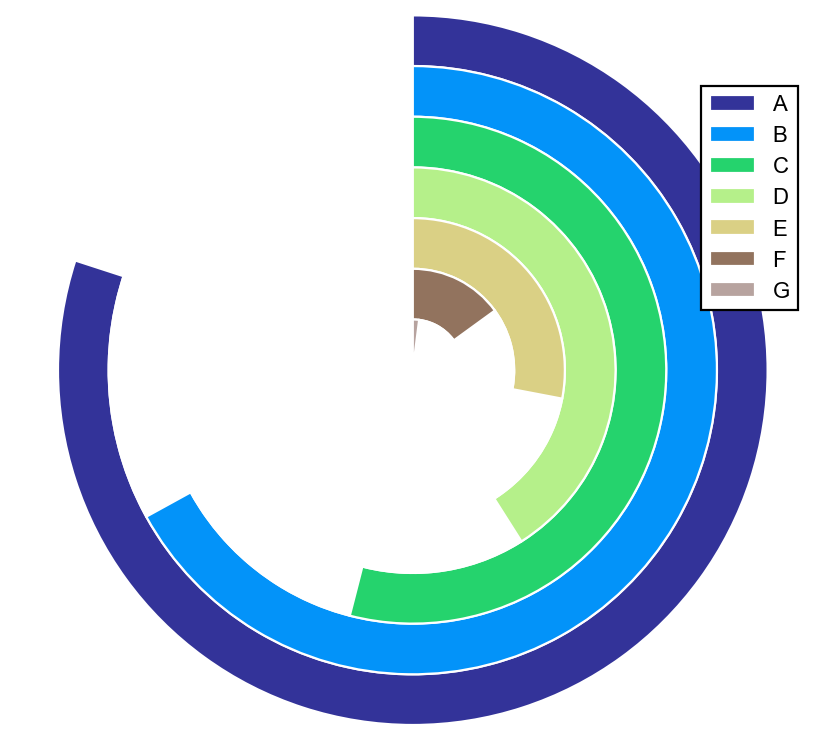

In [10]:
labels = list("ABCDEFG")
data = np.linspace(400, 10, 7)
#number of data points
n = len(data)
#find max value for full ring
k = 10 ** int(np.log10(max(data)))
m = k * (1 + max(data) // k)

#radius of donut chart
r = 1.5
#calculate width of each ring
w = r / n 

#create colors along a chosen colormap
colors = [cm.terrain(i / n) for i in range(n)]

#create figure, axis
fig, ax = plt.subplots()
ax.axis("equal")

#create rings of donut chart
for i in range(n):
    #hide labels in segments with textprops: alpha = 0 - transparent, alpha = 1 - visible
    innerring, _ = ax.pie([m - data[i], data[i]], radius = r - i * w, startangle = 90, labels = ["", labels[i]], labeldistance = 1 - 1 / (1.5 * (n - i)), textprops = {"alpha": 0}, colors = ["white", colors[i]])
    plt.setp(innerring, width = w, edgecolor = "white")

plt.legend()

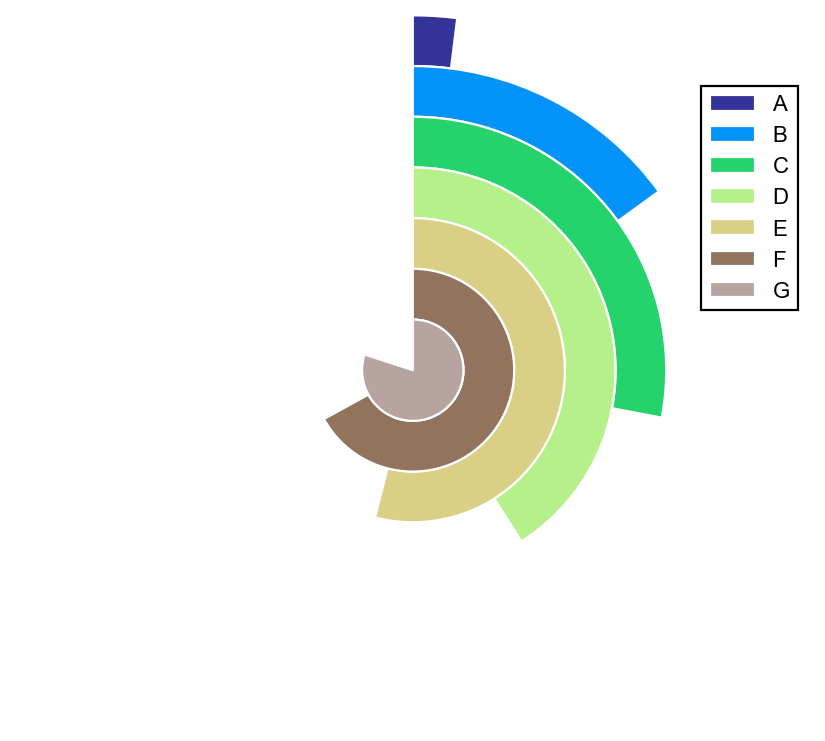

In [11]:
labels = list("ABCDEFG")
data = np.linspace(10, 400, 7)
#number of data points
n = len(data)
#find max value for full ring
k = 10 ** int(np.log10(max(data)))
m = k * (1 + max(data) // k)

#radius of donut chart
r = 1.5
#calculate width of each ring
w = r / n 

#create colors along a chosen colormap
colors = [cm.terrain(i / n) for i in range(n)]

#create figure, axis
fig, ax = plt.subplots()
ax.axis("equal")

#create rings of donut chart
for i in range(n):
    #hide labels in segments with textprops: alpha = 0 - transparent, alpha = 1 - visible
    innerring, _ = ax.pie([m - data[i], data[i]], radius = r - i * w, startangle = 90, labels = ["", labels[i]], labeldistance = 1 - 1 / (1.5 * (n - i)), textprops = {"alpha": 0}, colors = ["white", colors[i]])
    plt.setp(innerring, width = w, edgecolor = "white")

plt.legend()

<BarContainer object of 7 artists>

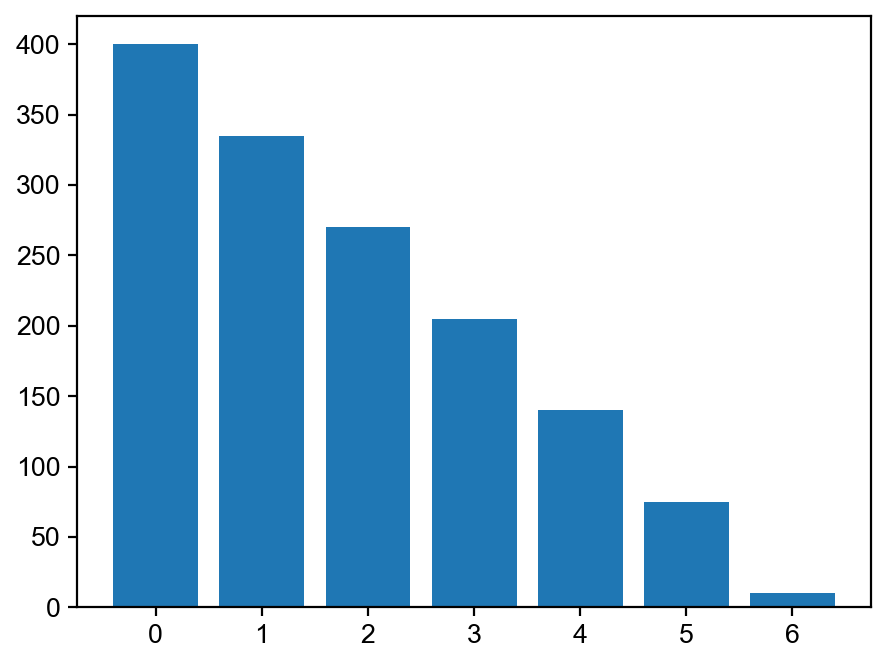

In [12]:
plt.bar(np.arange(7), np.linspace(400, 10, 7))